In [1]:
%matplotlib notebook
%pylab
from exact_r import *

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
hl = 2
hr = 1
ul = 0
ur = 0

g = 1
#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

# Spatial domain
ax = -5
bx = 5
ay = -2
by = 4
meqn = 2  # Number of equations in the system

# Gravity
g = 1

# Temporal domain
to = 0
Tfinal = 2

#intial data
ql = array([hl,hl*ul])
qr = array([hr,hr*ur])

N = 256

dx = (bx - ax)/N

cfl = 0.9

a = 1.7

dt_est = cfl*dx/a

M = int(floor(Tfinal/dt_est) + 1)

dt = Tfinal/(M)


t = linspace(to,Tfinal,M)

#x = linspace(ax+(dx/2),bx-(dx/2),N)

xe = linspace(ax,bx,N+1) #edge locations
x = xe[:-1] + dx/2       #Cell-center locations

In [3]:
#Initial conditions
qold1 = zeros(N)
qold2 = zeros(N)
qnew1 = zeros(N)
qnew2 = zeros(N)

qold1 = where(x <= 0 , ql[0], qr[0])
qold2 = where(x <= 0 , ql[1], qr[1]) 

In [4]:
#flux
def flux(q):
    '''
    input:
    -----
    q - state at the interface
    return:
    -------
    f - flux at the interface
    '''
    q1 = q[0]
    q2 = q[1]
    f = zeros(2)
    f[0] = q2
    f[1] = (((q2)**2)/q1) + (0.5*g*(q1)**2)
    return f

In [5]:
#Riemann solver
def rp1(mx,nout,qold1,qold2,g):
    for n in range(nout):
        
        for i in range(mx):
            if i == mx-1:
                q1l = array([qold1[i],qold2[i]])
                q1r = array([qold1[i],qold2[i]])
            else:
                q1l = array([qold1[i],qold2[i]])
                q1r = array([qold1[i+1],qold2[i+1]])
            
            if i == 0:
                q2l = array([qold1[i],qold2[i]])
                q2r = array([qold1[i],qold2[i]])
            else:
                q2l = array([qold1[i-1],qold2[i-1]])
                q2r = array([qold1[i],qold2[i]])
            
            #at the inteface
            hms1,ums1 = newton(q1l,q1r,g)
            hums1 = hms1*ums1
            q1e = array([hms1,hums1])

            f1 = flux(q1e) #f_{i+1/2}    

            hms2,ums2 = newton(q2l,q2r,g)
            hums2 = hms2*ums2
            q2e = array([hms2,hums2])

            f2 = (flux(q2e)) #f_{i-1/2}
            
            q = array([qold1[i],qold2[i]])
            amdq = flux(q) - f2
            apdq = f1 - flux(q)
    
            return amdq,apdq

<IPython.core.display.Javascript object>


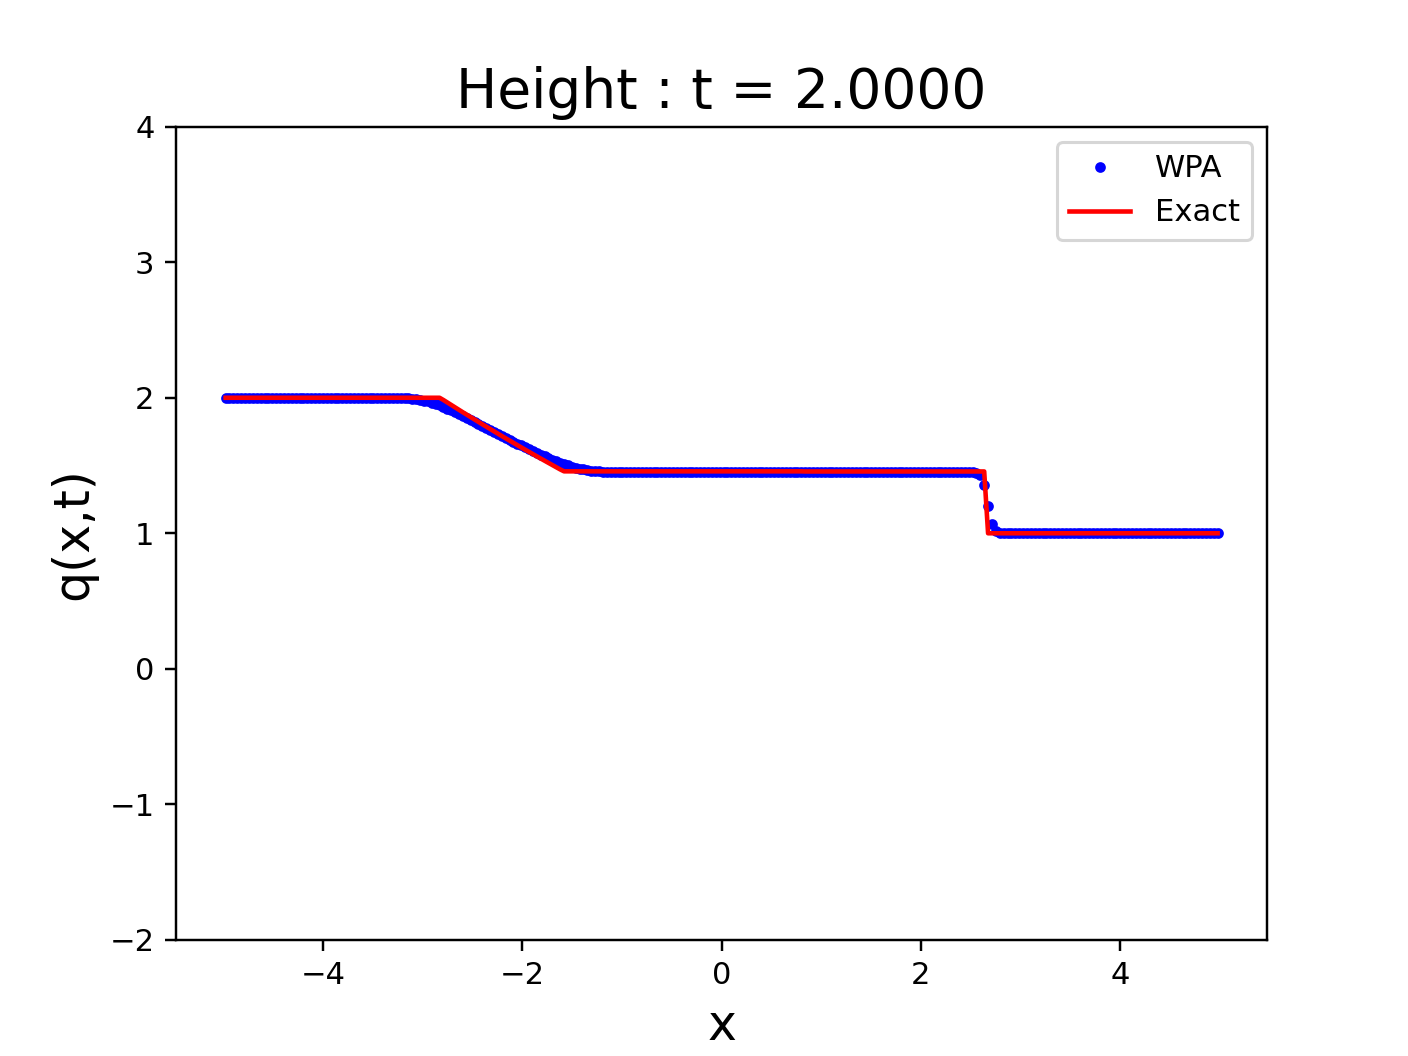

In [6]:
fig = figure(1)
clf()

mq =0

if mq == 0:
    tstr = 'Height : t = {:.4f}'
    hdl, = plot(x,qold1,'b.',markersize=5,label='WPA')
else:
    tstr = 'Momentum : t = {:.4f}'
    hdl, = plot(x,qold2,'b.',markersize=5,label='WPA')

htitle = title(tstr.format(0),fontsize=18)

q0 = qexact(x,to,mq,ql,qr,g)

hde, = plot(x,q0,'r-',markersize=5,label='Exact')


for n in range(M):
    #exact solver
    q = qexact(x,t[n],mq,ql,qr,g)
    
    hde.set_ydata(q)
    
    for i in range(N):
        
        if i == N-1:
            q1l = array([qold1[i],qold2[i]])
            q1r = array([qold1[i],qold2[i]])
        else:
            q1l = array([qold1[i],qold2[i]])
            q1r = array([qold1[i+1],qold2[i+1]])

        if i == 0:
            q2l = array([qold1[i],qold2[i]])
            q2r = array([qold1[i],qold2[i]])
        else:
            q2l = array([qold1[i-1],qold2[i-1]])
            q2r = array([qold1[i],qold2[i]])

        #at the inteface
        hms1,ums1 = newton(q1l,q1r,g)
        hums1 = hms1*ums1
        q1e = array([hms1,hums1])

        f1 = flux(q1e) #f_{i+1/2}    

        hms2,ums2 = newton(q2l,q2r,g)
        hums2 = hms2*ums2
        q2e = array([hms2,hums2])

        f2 = (flux(q2e)) #f_{i-1/2}

        q = array([qold1[i],qold2[i]])
        amdq = flux(q) - f2
        apdq = f1 - flux(q)
        
        #soln at N+1
        qnew1[i] = qold1[i] - (dt/dx)*(apdq[0] + amdq[0])

        qnew2[i] = qold2[i] - (dt/dx)*(apdq[1] + amdq[1])

    if mq == 0:
        hdl.set_ydata(qnew1)
    else:
        hdl.set_ydata(qnew2)
        
    #overwrite the soln
    qold1 = qnew1.copy()
    qold2 = qnew2.copy()
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t[n]))
    
    ylim([ay,by])
    legend()
    pause(0.1)

    fig.canvas.draw()        